## 인공 신경망

In [1]:
#실행마다 동일한 결과를 얻기 위해 케라스에 랜덤시드를 사용하고 텐서플로 연산을 결정적으로 만듦
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### 패션 MNIST

In [2]:
from tensorflow import keras

#훈련 데이터와 테스트 데이터를 나누어 반환
(train_input, train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 28x28크기의 이미지가 60,000개 있음, 타깃은 60,000개의 원소가 있는 1차원 배열
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


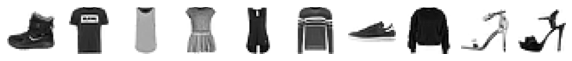

In [5]:
import matplotlib.pyplot as plt

fig,axs=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
#0: 티셔츠, 1: 바지, 2: 스웨터, 3: 드레스, 4: 코트, 5: 샌달, 6: 셔츠, 7: 스니커즈, 8: 가방, 9: 앵클부츠
print([train_target[i] for i in range(10)])#처음 10개 샘플의 타깃값을 리스트로 만든 후 출력

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
import numpy as np

print(np.unique(train_target, return_counts=True))#각 레이블마다 6,000개의 샘플이 들어있음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


### 로지스틱 회귀로 패션 아이템 분류하기

In [8]:
train_scaled=train_input/255.0 #0~1사이의 값으로 정규화
train_scaled=train_scaled.reshape(-1,28*28) #두 번째, 세 번째 차원이 1차원으로 합쳐짐(28x28이미지 크기에 맞게)

In [9]:
print(train_scaled.shape) #784개의 픽셀로 이루어진 60,000개의 샘플이 준비됨

(60000, 784)


In [10]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log',max_iter=5,random_state=42)

scores=cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


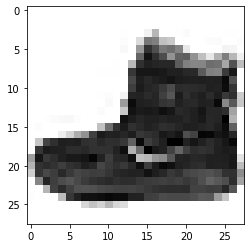

In [14]:
plt.imshow(train_input[0].reshape(28,28),cmap='gray_r')
plt.show()

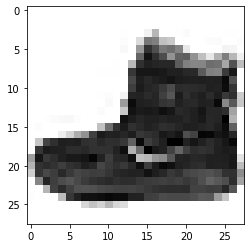

In [15]:
plt.imshow(train_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [16]:
pred=sc.predict(train_scaled[0].reshape(-1,784))
print(pred)

[9]


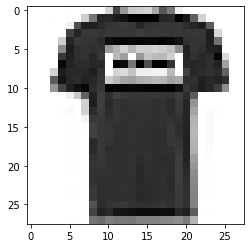

In [17]:
plt.imshow(train_scaled[1].reshape(28,28),cmap='gray_r')
plt.show()

In [18]:
print(np.round(train_scaled[1].reshape(28,28),decimals=2))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.16 0.74 0.4  0.21
  0.19 0.17 0.34 0.66 0.52 0.06 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.19 0.53 0.86 0.85 0.89 0.93 1.
  1.   1.   1.   0.85 0.84 1.   0.91 0.63 0.18 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.05 0.69 0.87 0.88 0.83 0.8  0.78 0.77 0.78
  0.84 0.8  0.79 0.79 0.79 0.79 0.82 0.85 0.88 0.64 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.74 0.86 0.78 0.78 0.79 0.78 0.78 0.78 0.79
  0.77 0.78 0.78 0.78 0.78 0.78 0.78 0.79 0.78 0.88 0.16 0.   0.   0.  ]
 [0.   0.   0.   0.   0.2  0.86 0.78 0.8  0.8  0.83 0.93 0.97 0.98 0.96
  0.98 0.96 0.97 0.99 0.97 0.92 0.81 0.8  0.8  0.87 0.55 0.   0.   0.  ]
 [0.   0.   0.   0.   0.45 0.89 0.81 0.8  0.81 0.8  0.4  0.29 0.18 0.29
  0.19 0.2  0.18 0.2  0.25 0.44 0.87 0.79 0.81 0.86 0.88 0.   0.   0.  ]
 [0.   0.   0.   0.   0.78 0.87 0.82 0.8  0.84 0.78 0.   0.27 0.38 0.
  0.4  0.23 0.27 0.28 0.19 0.   0.86 0.81 0.84 0.82 0.98 0.15 

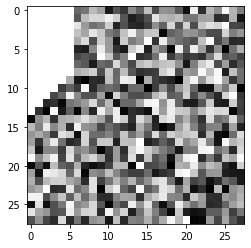

[8]


In [25]:
mydata=np.random.rand(784).reshape(28,28)

mydata[:14,0]=0
mydata[:13,1]=0
mydata[:12,2]=0
mydata[:11,3]=0
mydata[:10,4]=0
mydata[:9,5]=0

plt.imshow(mydata,cmap='gray_r')
plt.show()

pred=sc.predict(mydata.reshape(-1,784))
print(pred)

로지스틱 회귀 공식<br>
$ Z(티셔츠) = w1 \times (픽셀1) + w2 \times (픽셀2) +...+w784 \times (픽셀784) + b$<br>
$ Z(바지) = w1' \times (픽셀1) + w2' \times (픽셀2) +...+w784' \times (픽셀784) + b$<br>
10개의 클래스에 대한 선형 방정식을 모두 계산한 다음에는 소프트맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음

### 인공신경망으로 모델 만들기

![인공신경망](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcT2tYp%2FbtryU0SToKX%2FzzFHOd5O7sVm8Ji4Yh8X1k%2Fimg.png)<br>
* **출력층**: z1~z10을 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종 값을 만든다는 의미<br>
* **뉴런**: z값을 계산하는 단위(이제는 **유닛**이라고 부르는 사람이 더 많아짐<br>
* **입력층**: x1~x784까지를 입력층이라 부름, 픽셀값 자체이고 특별한 계산은 수행하지 않음<br>
![인공지능](https://velog.velcdn.com/images/oooops/post/d128d543-30c6-4a36-adc4-877f69c276f0/image%20(1).png)

인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용함<br>
1) 딥러닝 분야에서는 데이터셋이 충분히 크고 검증점수가 안정적임<br>
2) 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸림

In [27]:
from sklearn.model_selection import train_test_split

train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [28]:
print(train_scaled.shape,train_target.shape)

(48000, 784) (48000,)


In [30]:
print(val_scaled.shape,val_target.shape)

(12000, 784) (12000,)


In [31]:
#밀집층, 완전 연결층
dense=keras.layers.Dense(10,activation='softmax',input_shape=(784,))#뉴런 개수,뉴런출력에 적용할 함수,입력크기

In [32]:
model=keras.Sequential(dense)

![신경망](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FxRwQB%2FbtrAdGsSBbL%2FKTWNTpEiD9IHtALKqwedK1%2Fimg.png)

### 인공신경망으로 패션 아이템 분류하기

In [33]:
#이진 분류: 'binary_crossentropy', 다중 분류: 'categorical_crossentropy'
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy') #정확도도 함께 출력

![원-핫 인코딩](https://velog.velcdn.com/images%2Foooops%2Fpost%2F3291c5c0-0cd4-4d21-8435-c7a17da3f56f%2Fimage.png)

In [34]:
#정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고 그냥 사용할 수 있음
#'sparse_categorical_crossentropy'를 사용하여 크로스 엔트로피 손실을 계산함
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [35]:
model.fit(train_scaled,train_target,epochs=5)#정확도 85% 넘음

Epoch 1/5
1500/1500 [==============================] - 1s 604us/step - loss: 0.6058 - accuracy: 0.7932
Epoch 2/5
1500/1500 [==============================] - 1s 594us/step - loss: 0.4785 - accuracy: 0.8385
Epoch 3/5
1500/1500 [==============================] - 1s 590us/step - loss: 0.4564 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 1s 591us/step - loss: 0.4435 - accuracy: 0.8539
Epoch 5/5
1500/1500 [==============================] - 1s 599us/step - loss: 0.4358 - accuracy: 0.8551


In [36]:
model.evaluate(val_scaled,val_target)#모델성능평가

375/375 [==============================] - 0s 519us/step - loss: 0.4579 - accuracy: 0.8483


[0.45794257521629333, 0.8483333587646484]

In [ ]:
#0: 티셔츠, 1: 바지, 2: 스웨터, 3: 드레스, 4: 코트, 5: 샌달, 6: 셔츠, 7: 스니커즈, 8: 가방, 9: 앵클부츠

1/1 [==============================] - 0s 50ms/step
[[4.5567799e-01 4.1671508e-04 1.8777752e-02 2.9371679e-04 7.0087984e-02
  5.4131426e-14 3.4695590e-01 2.4014102e-12 1.0778987e-01 9.8402969e-18]]
0


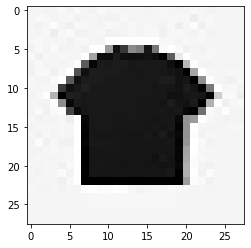

In [49]:
import cv2

def t1():
    t1=cv2.imread('t1.png',cv2.IMREAD_GRAYSCALE)
    return t1

t1=t1()/255.0
t1=1-t1
pred=model.predict(t1.reshape(-1,784))
print(pred)

print(np.argmax(pred))

plt.imshow(t1,cmap='gray_r')
plt.show()

1/1 [==============================] - 0s 15ms/step
[[1.3269741e-07 1.1170893e-15 6.6930034e-12 2.5495015e-17 2.5976931e-18
  7.5410578e-14 2.6603011e-06 1.8006781e-21 9.9999726e-01 3.2920246e-11]]
8


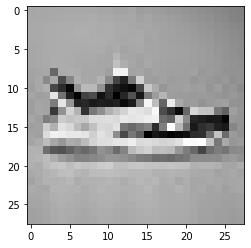

In [52]:
def sn1():
    sh1 = cv2.imread('sn1.png', cv2.IMREAD_GRAYSCALE)
    return sh1

sh1 = sn1()/255.0
sh1 = 1 - sh1
pred = model.predict(sh1.reshape(-1,784))
print(pred)

print(np.argmax(pred))

plt.imshow(sh1,cmap='gray_r')
plt.show()